In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,TP_ESCOLA,TP_LINGUA,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Ocupacao_Mae,Renda_Mensal,Banheiros,Quartos,Carro,...,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,DESEMPENHO_BAIXO,Renda_per_capta,Pessoas_por_quarto,Pessoas_por_computador,Pessoas_por_celular
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,...,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,4.491498e-01,5.271628e-01,3.439471e+00,4.073692e+00,2.296138e+00,2.226948e+00,3.496580e+00,1.369465e+00,2.249797e+00,5.234391e-01,...,2.136560e-01,2.399529e+00,2.399118e-01,6.882020e-01,7.773933e-01,5.000047e-01,8.346541e+02,1.871815e+00,1.819410e+00,1.873938e+00
std,6.148688e-01,4.992617e-01,1.873869e+00,1.719509e+00,1.392760e+00,1.279828e+00,3.254036e+00,7.059705e-01,7.662689e-01,6.844870e-01,...,4.098868e-01,1.070197e+00,4.270295e-01,7.721223e-01,4.159964e-01,5.000001e-01,1.252211e+03,9.952978e-01,1.986800e+00,1.311751e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.994000e+02,1.333333e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.990000e+02,1.666667e+00,1.333333e+00,1.500000e+00
75%,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.316667e+02,2.000000e+00,3.000000e+00,2.000000e+00
max,2.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,4.000000e+00,4.000000e+00,4.000000e+00,...,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+04,2.000000e+01,2.000000e+01,2.000000e+01


### Spliting train and test data

In [3]:
train, test = train_test_split(data, test_size=0.30)

## XGBoost

### First attempt

In [ ]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

### Permutation Importance

In [ ]:
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Permutation_XGBoost.png")

### Removing unnecessary features

In [3]:
data = data.drop(["Telefone_Fixo", "Microondas", "Televisao", "Quartos", "Internet", "Pessoas_por_quarto",
                 "Celular", "Carro", "TV_Assinatura", "Lava_Roupa"], 1)
train, test = train_test_split(data, test_size=0.30)

### Secound attempt

In [ ]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

### Permutation Importance

In [ ]:
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Permutation_XGBoost_2.png")

### Removing unnecessary features

In [4]:
data = data.drop(["Freezer", "Banheiros"], 1)
train, test = train_test_split(data, test_size=0.30)

In [5]:
data.describe()

,TP_ESCOLA,TP_LINGUA,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Ocupacao_Mae,Renda_Mensal,Computador,DESEMPENHO_BAIXO,Renda_per_capta,Pessoas_por_computador,Pessoas_por_celular
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,4.491498e-01,5.271628e-01,3.439471e+00,4.073692e+00,2.296138e+00,2.226948e+00,3.496580e+00,6.882020e-01,5.000047e-01,8.346541e+02,1.819410e+00,1.873938e+00
std,6.148688e-01,4.992617e-01,1.873869e+00,1.719509e+00,1.392760e+00,1.279828e+00,3.254036e+00,7.721223e-01,5.000001e-01,1.252211e+03,1.986800e+00,1.311751e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.994000e+02,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.990000e+02,1.333333e+00,1.500000e+00
75%,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,8.316667e+02,3.000000e+00,2.000000e+00
max,2.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,4.000000e+00,1.000000e+00,3.000000e+04,2.000000e+01,2.000000e+01


### Third attempt

Precision: 0.6980966666666667
Recall: 0.7465710037273873


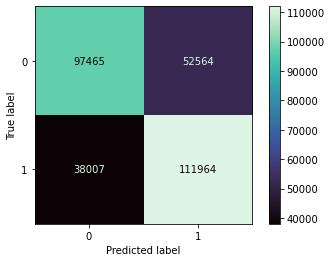

In [8]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

In [ ]:
model = xgb.XGBClassifier(n_jobs = -1, max_depth = 2).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

Precision: 0.6972345819264308
Recall: 0.7458061661944236


## Random Forest and Random Grid Search

In [9]:
random_grid = {'n_estimators': [100, 200, 300, 400],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5, 10, 15, 20, 30, 40],
               'min_samples_split': [20, 40, 60, 80],
               'min_samples_leaf': [10, 20, 40, 60],
               'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, 
                               random_state=42, n_jobs = -1)
rf_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 60,
 'min_samples_leaf': 40,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

Precision: 0.6900659534854365
Recall: 0.7372633815105648


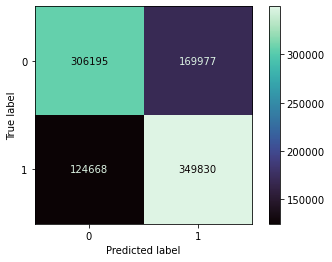

In [22]:
model = RandomForestClassifier(n_jobs = -1,  max_depth = 15, n_estimators = 1).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

Precision: 0.6840007573605983
Recall: 0.7039839999325603


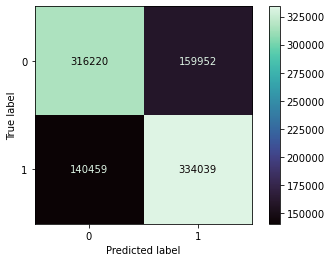

In [73]:
model = DecisionTreeClassifier(max_depth = 5).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "mako")

[Text(2790.0, 2491.5, 'Renda_Mensal <= 3.5\ngini = 0.5\nsamples = 2218228\nvalue = [1108262, 1109966]\nclass = Acima_da_Media'),
 Text(1395.0, 2038.5, 'Computador <= 0.5\ngini = 0.472\nsamples = 1445728\nvalue = [551262, 894466]\nclass = Acima_da_Media'),
 Text(697.5, 1585.5, 'Escolaridade_Mae <= 3.5\ngini = 0.419\nsamples = 867482\nvalue = [258811, 608671]\nclass = Acima_da_Media'),
 Text(348.75, 1132.5, 'Renda_Mensal <= 1.5\ngini = 0.367\nsamples = 443752\nvalue = [107291, 336461]\nclass = Acima_da_Media'),
 Text(174.375, 679.5, 'TP_LINGUA <= 0.5\ngini = 0.33\nsamples = 278341\nvalue = [58095, 220246]\nclass = Acima_da_Media'),
 Text(87.1875, 226.5, 'gini = 0.378\nsamples = 81377\nvalue = [20574, 60803]\nclass = Acima_da_Media'),
 Text(261.5625, 226.5, 'gini = 0.308\nsamples = 196964\nvalue = [37521, 159443]\nclass = Acima_da_Media'),
 Text(523.125, 679.5, 'TP_LINGUA <= 0.5\ngini = 0.418\nsamples = 165411\nvalue = [49196, 116215]\nclass = Acima_da_Media'),
 Text(435.9375, 226.5, 'gin

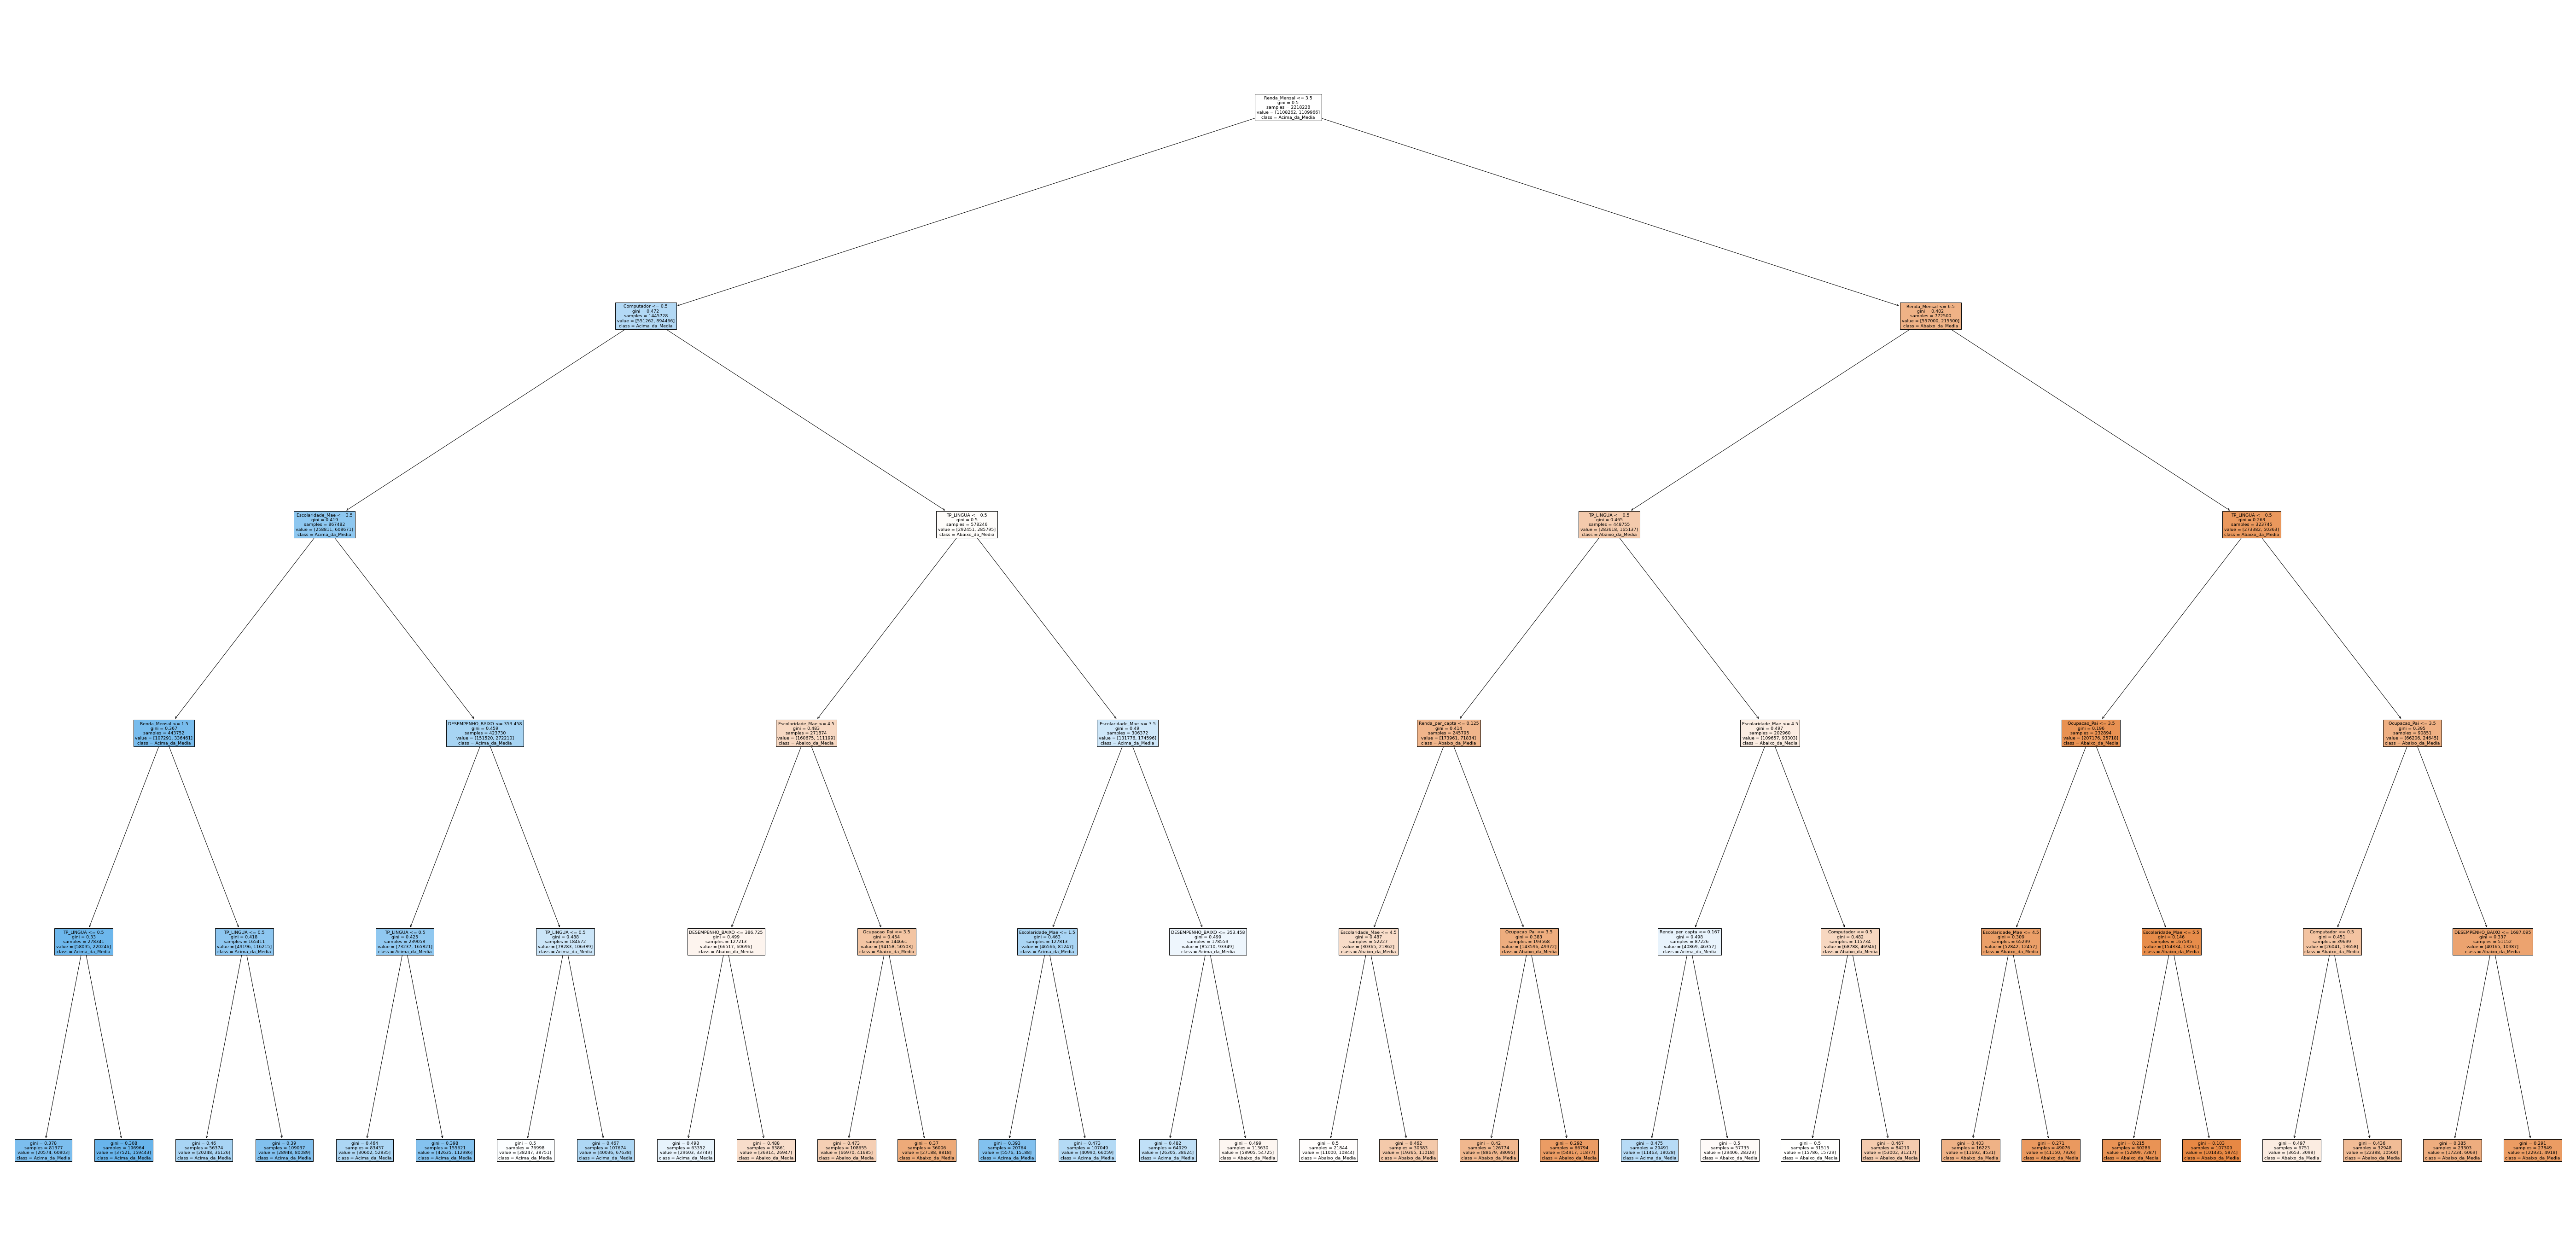

In [74]:
plt.figure(figsize=(100,50))
tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True)

## Saving data

In [11]:
data.to_csv("../dataset/dataset_4.csv", sep = ";")